### Complex EOF application to wind vectors over Salish Sea in Washington
S. C. Crosby

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from scipy import io
import mplleaflet

In [2]:
fname = '../offline_data/SalishSea_NNRP_Grid.mat'
data = io.loadmat(fname)
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'lat_m', 'lon_m', 'slp', 'windu', 'windv'])

In [48]:
lat = data['lat_m'][40:71,70:111]
lon = data['lon_m'][40:71,70:111]

u = data['windu']
v = data['windv']
type(u)

numpy.ndarray

In [33]:
u.shape

(31, 41, 89120)

In [34]:
u = u.reshape([31*41,89120])
v = v.reshape([31*41,89120])

In [35]:
u.shape

(1271, 89120)

In [36]:
Nt = 5000
U = u[:,1:Nt] + v[:,1:Nt]*1j

In [37]:
uu, ss, vvh = np.linalg.svd(U)

array([0.70054228, 0.07330707, 0.05361313])

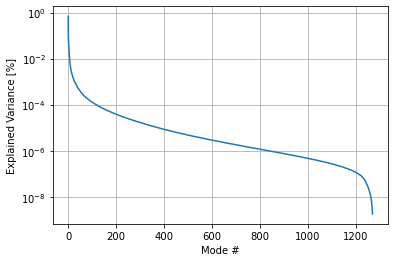

In [78]:
var = ss**2
var = var/np.sum(var)
plt.semilogy(var)
plt.grid()
plt.ylabel('Explained Variance [%]')
plt.xlabel('Mode #')
var[:3]

In [75]:
# Plot the first few modes
from matplotlib import cm
myc = cm.get_cmap('Set1')

mode = np.reshape(uu[:,1],[31,41])
plt.quiver(lon,lat,-np.real(mode),-np.imag(mode),scale=1,color=myc(1))
mode = np.reshape(uu[:,2],[31,41])
plt.quiver(lon,lat,-np.real(mode),-np.imag(mode),scale=1,color=myc(2))
mode = np.reshape(uu[:,3],[31,41])
plt.quiver(lon,lat,-np.real(mode),-np.imag(mode),scale=1,color=myc(3))
#mode = np.reshape(uu[:,4],[31,41])
#plt.quiver(lon,lat,-np.real(mode),-np.imag(mode),scale=1,color='r')

# Add to generate html on openstreetmap basemap
mplleaflet.show(path='wind_eof_map.html')
